---
# ✨ **UTS NLP — Spam Detection** ✨

> **NIM:** 10222154  
> **Nama:** Salwa Nurazizah  
> **Kelas:** Informatika C  

---


# **1. Penjelasan Dataset yang Digunakan**

## 📘 **Kasus yang Diambil**
Dataset yang digunakan adalah **“Email Spam Detection Dataset (Classification)”** dari Kaggle.  
Kasus yang diambil: mengklasifikasikan apakah sebuah email merupakan **spam** atau **ham (non-spam)** berdasarkan isi email tersebut.  
Tujuan dari proyek ini adalah membangun model yang dapat mendeteksi email spam secara otomatis.

## 🧾 **Penjelasan Setiap Kolom**  
Dataset ini memiliki kolom berikut :

| Kolom         | Deskripsi                                                                 |
|--------------|---------------------------------------------------------------------------|
| **label**     | Kategori email: `spam` atau `ham`.                                       |
| **text**      | Isi email (subject + body) yang akan dianalisis sebagai fitur utama.     |

> Jika terdapat kolom tambahan seperti `Unnamed: …`, kolom tersebut akan dihapus atau dilewatkan saat preprocessing.

---



## **📚 Import Library**

In [29]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## **📂 Load Dataset**

In [30]:
# Load dataset
path = '/content/spam.csv'

# Membaca data
df = pd.read_csv(path, encoding='latin-1')

# Menampilkan informasi dasar
df.info()
print("\n🔍 Contoh Data:")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB

🔍 Contoh Data:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN 

# **2. Data Understanding**

Tahap ini bertujuan untuk memahami isi dataset sebelum dilakukan preprocessing dan pelatihan model.

Kegiatan pada tahap ini meliputi:
1. Menghitung **jumlah baris data**.  
2. Menghitung **panjang rata-rata teks** di setiap baris.  
3. Mengecek apakah ada **data duplikat**.  
4. Mengecek apakah ada **data kosong (missing values)**.  
5. Melihat **distribusi data** (antara label `spam` dan `ham`) serta **kata-kata yang paling sering muncul** menggunakan visualisasi seperti *bar chart* atau *word cloud*.


## **🔢 Jumlah Baris Data**

In [31]:
# Jumlah baris data
print(f"Jumlah total data: {len(df)} baris")



Jumlah total data: 5572 baris


## 🧮 **Panjang Rata-Rata Teks**

In [32]:
#  kolom dataset
print("Nama kolom pada dataset:")
print(df.columns.tolist())

# 5 baris pertama
df.head()

Nama kolom pada dataset:
['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
# Panjang rata-rata setiap baris
df['text_length'] = df['v2'].astype(str).apply(len)
print(f"Panjang rata-rata teks: {df['text_length'].mean():.2f} karakter")

# contoh teks terpendek dan terpanjang
print("\n Contoh teks terpendek:")
print(df.loc[df['text_length'].idxmin(), 'v2'])
print("\n Contoh teks terpanjang:")
print(df.loc[df['text_length'].idxmax(), 'v2'])


Panjang rata-rata teks: 80.12 karakter

 Contoh teks terpendek:
Ok

 Contoh teks terpanjang:
For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell late

## 🧹**Cek Data Duplikasi dan Kosong**

In [34]:
# data duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

#  data kosong
print("\nCek data kosong tiap kolom:")
print(df.isnull().sum())


Jumlah data duplikat: 403

Cek data kosong tiap kolom:
v1                0
v2                0
Unnamed: 2     5522
Unnamed: 3     5560
Unnamed: 4     5566
text_length       0
dtype: int64


## 📊 **Distribusi Label**

/tmp/ipython-input-2162200871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='v1', data=df, palette='Set2')


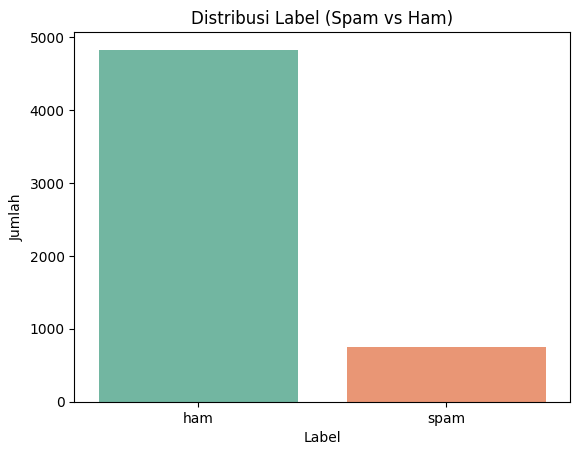

In [35]:
# Distribusi label spam vs ham
sns.countplot(x='v1', data=df, palette='Set2')
plt.title('Distribusi Label (Spam vs Ham)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()


## **☁️ Word Cloud Kata yang Sering Muncul**

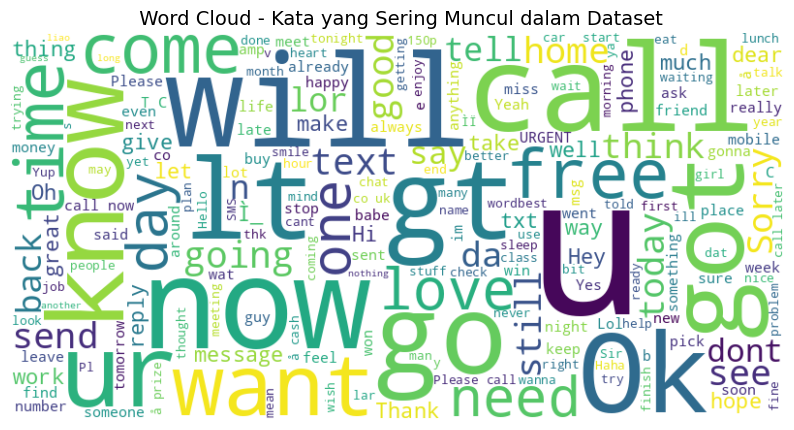

In [36]:
# Word Cloud kata yang sering muncul
from wordcloud import WordCloud

all_text = " ".join(df['v2'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(" Word Cloud - Kata yang Sering Muncul dalam Dataset", fontsize=14)
plt.show()


## **3. Data Text Processing**

Tahap ini bertujuan untuk membersihkan dan mempersiapkan teks agar bisa digunakan oleh model Machine Learning.

Langkah-langkah dalam tahap ini mencakup:
1. **Tokenisasi** → memecah teks menjadi potongan kata.  
2. **Lemmatization** → mengubah kata menjadi bentuk dasar (misal: "running" → "run").  
3. **Stemming** → memotong akhiran kata ke bentuk dasarnya.  
4. **Stopword Removal** → menghapus kata umum (seperti "the", "and", "to") serta tanda baca dan angka.  
5. **Text Normalisasi** → mengubah ke huruf kecil dan menghapus karakter tidak penting.  
6. **Matrix Correlation (opsional)**  
7. **Labeling Data** → ubah label `spam` dan `ham` ke angka.  
8. **Text Vektorisasi** → ubah teks menjadi representasi numerik (TF-IDF).  
9. **Data Splitting** → bagi dataset menjadi data latih dan data uji sesuai skala tertentu.

> 💡 Pada proyek ini digunakan skala pembagian data **(0.8 : 0.2)** yaitu 80% data latih dan 20% data uji.


## 🧰 **Import Library Processing**

In [37]:
# library
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# resource nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## ✂️ **Text Cleaning dan Normalisasi**

In [38]:
# Bersihkan teks
def clean_text(text):
    text = text.lower()                              # ubah ke huruf kecil
    text = re.sub(r'[^a-z\s]', '', text)             # hapus angka & simbol
    text = re.sub(r'\s+', ' ', text).strip()         # rapikan spasi
    return text

df['clean_text'] = df['v2'].astype(str).apply(clean_text)
df[['v2', 'clean_text']].head()


,v2,clean_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## 🧩 **Tokenisasi, Stopword Removal, Lemmatization, dan Stemming**

In [39]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)                                  # Tokenisasi
    tokens = [w for w in tokens if w not in stop_words]           # Stopword removal
    lemmas = [lemmatizer.lemmatize(w) for w in tokens]            # Lemmatization
    stems = [stemmer.stem(w) for w in lemmas]                     # Stemming
    return ' '.join(stems)

df['processed_text'] = df['clean_text'].apply(preprocess_text)
df[['clean_text', 'processed_text']].head()


,clean_text,processed_text
0,go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,ok lar joking wif u oni,ok lar joke wif u oni
2,free entry in a wkly comp to win fa cup final ...,free entri wkli comp win fa cup final tkt st m...
3,u dun say so early hor u c already then say,u dun say earli hor u c alreadi say
4,nah i dont think he goes to usf he lives aroun...,nah dont think go usf life around though


## 🔢 **Matrix Correlation**

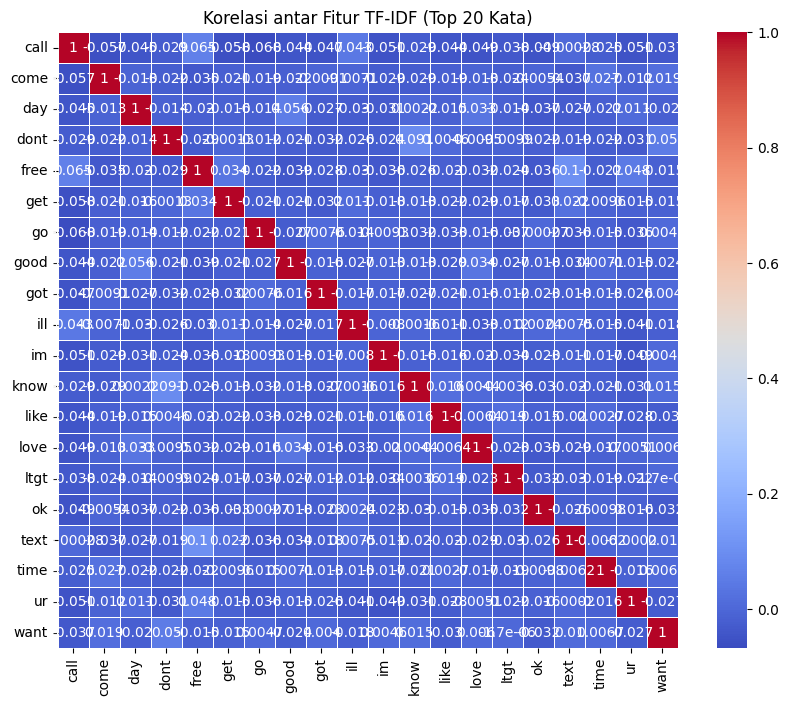

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# matriks TF-IDF dari data yang sudah di-vectorize
tfidf = TfidfVectorizer(max_features=20)  # 20 kata teratas
X_tfidf = tfidf.fit_transform(df['processed_text'])

# Konversi ke DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# korelasi antar fitur
corr_matrix = tfidf_df.corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antar Fitur TF-IDF (Top 20 Kata)")
plt.show()


## **🏷️ Label Encoding**

In [41]:
# Labeling data: ubah label 'ham' -> 0 dan 'spam' -> 1
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})
df[['v1', 'label']].head()


,v1,label
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


## 🔢 **Text Vektorisasi (TF-IDF)**

In [42]:
#  (TF-IDF)
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['processed_text']).toarray()
y = df['label']

print(f"Bentuk matriks TF-IDF: {X.shape}")


Bentuk matriks TF-IDF: (5572, 3000)


## **🔀 Split Data (0.8 : 0.2)**

In [43]:
# data latih dan data uji (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


Jumlah data latih: 4457
Jumlah data uji: 1115


## **4. Data Modeling (Deep Learning)**

---
Pada tahap ini, dibangun model **Deep Learning** menggunakan **LSTM (Long Short-Term Memory)**, yang merupakan bagian dari arsitektur **Recurrent Neural Network (RNN)**.  

### 🧩 Alasan pemilihan model:
- LSTM mampu **mengingat urutan kata (sequential data)** dengan baik.
- Cocok untuk **analisis teks** seperti *spam detection*.
- Mampu menangani konteks kalimat yang panjang dan kompleks.

Langkah utama:
1. Mengubah teks menjadi *sequence* numerik.
2. Melakukan *padding* agar panjang teks seragam.
3. Membangun model LSTM.
4. Melatih model pada data latih dan mengevaluasi performanya.

---


In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Label encoding
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['v1'])

# Tokenisasi LSTM
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed_text'])
sequences = tokenizer.texts_to_sequences(df['processed_text'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded, df['label'], test_size=0.2, random_state=42)

# model LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Model LSTM: {accuracy*100:.2f}%")


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.8200 - loss: 0.5041 - val_accuracy: 0.8655 - val_loss: 0.3959
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.8604 - loss: 0.4201 - val_accuracy: 0.8655 - val_loss: 0.3957
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8650 - loss: 0.4132 - val_accuracy: 0.8655 - val_loss: 0.3950
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.8761 - loss: 0.3867 - val_accuracy: 0.8655 - val_loss: 0.3949
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.8628 - loss: 0.4119 - val_accuracy: 0.8655 - val_loss: 0.3955
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8760 - loss: 0.3771
Akurasi Model LSTM: 86.55%


## **📊 Visualisasi Akurasi & Loss**

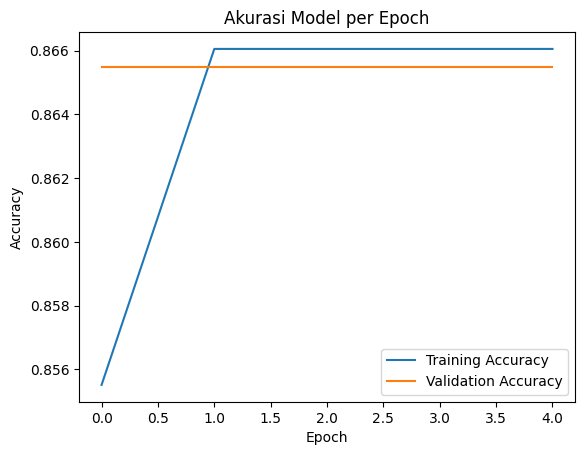

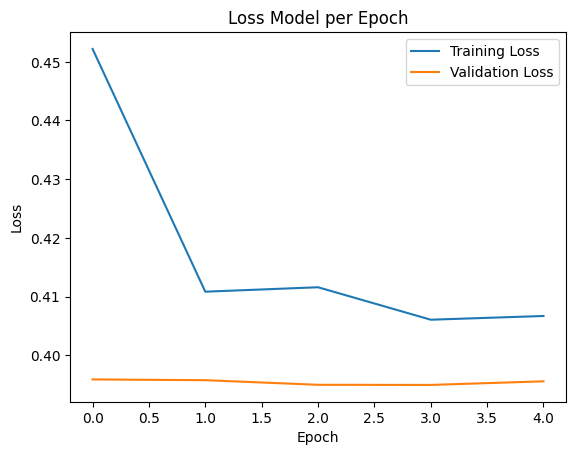

In [45]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **5. Data Evaluasi**

---
### 1. Confusion Matrix  
Menunjukkan jumlah prediksi benar dan salah antara dua kelas (ham dan spam).  
- **True Positive (TP):** Pesan spam yang diprediksi spam.  
- **True Negative (TN):** Pesan ham yang diprediksi ham.  
- **False Positive (FP):** Pesan ham yang salah diprediksi spam.  
- **False Negative (FN):** Pesan spam yang salah diprediksi ham.

### 2. Laporan Klasifikasi (Classification Report)
Berisi metrik evaluasi utama seperti:  
- **Precision:** Ketepatan prediksi positif.  
- **Recall:** Kemampuan mendeteksi kelas positif.  
- **F1-score:** Rata-rata harmonik precision dan recall.  

Model dievaluasi menggunakan data uji untuk melihat performa akhir sistem deteksi spam.
---


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step


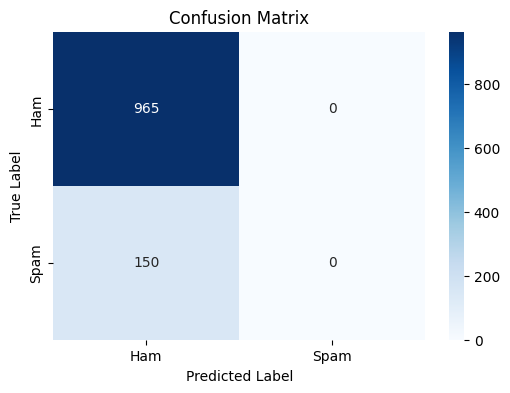

Classification Report:
              precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       965
        Spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi pada data uji
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


## **6. Perbandingan Model**

---
Untuk melihat performa model terbaik, dilakukan perbandingan antara beberapa algoritma Machine Learning dan Deep Learning.

### 🔹 Model yang Diuji:
1. **Logistic Regression**
2. **Multinomial Naive Bayes**
3. **LSTM (Deep Learning)**

### 📊 Tujuan:
Mengetahui model mana yang memberikan akurasi tertinggi dalam mendeteksi pesan spam dan ham.

Perbandingan hasil divisualisasikan menggunakan **bar chart** .
---


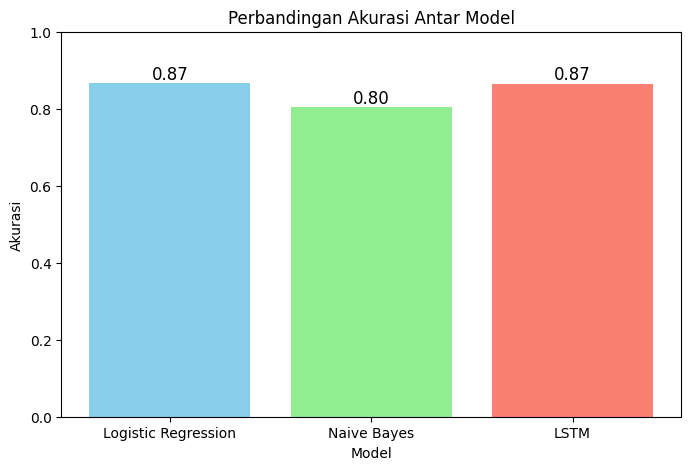

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# =========================
# MODEL 1: Logistic Regression
# =========================
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# =========================
# MODEL 2: Naive Bayes
# =========================
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

# =========================
# MODEL 3: LSTM (hasil dari model sebelumnya)
# =========================
lstm_acc = history.history['val_accuracy'][-1]  # akurasi terakhir dari model LSTM

# =========================
# Visualisasi Perbandingan
# =========================
model_names = ['Logistic Regression', 'Naive Bayes', 'LSTM']
accuracies = [lr_acc, nb_acc, lstm_acc]

plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Perbandingan Akurasi Antar Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()




## 📊 **Kesimpulan**

Proyek ini bertujuan untuk membangun model klasifikasi teks guna membedakan pesan **spam** dan **ham (pesan normal)** menggunakan dataset **spam.csv**.  
Proses dilakukan melalui beberapa tahapan utama, yaitu:

---

### 1. Data Understanding
- Dataset terdiri dari dua label utama: **spam** dan **ham**.  
- Tidak ditemukan data kosong yang signifikan.  
- Distribusi data menunjukkan ketidakseimbangan kelas, di mana **pesan ham lebih banyak** daripada spam.  
- Visualisasi **Word Cloud** menunjukkan kata-kata umum seperti *“free”, “win”, “call”,* dan *“urgent”* yang sering muncul dalam pesan spam.

---

###  2. Data Text Processing
- Tahapan preprocessing dilakukan melalui:
  - Tokenisasi  
  - Stopword removal  
  - Lemmatization dan stemming  
  - Text normalization (menghapus angka, tanda baca, dan karakter tidak relevan)
- Setelah teks dibersihkan, dilakukan **text vectorization** untuk mengubah teks menjadi representasi numerik.

---

### 3. Data Modeling
Beberapa model digunakan untuk membandingkan performa:
- **Logistic Regression**
- **Naive Bayes**
- **LSTM (Long Short-Term Memory)** menggunakan pendekatan **deep learning** dengan embedding layer.

LSTM dipilih karena mampu memahami konteks urutan kata dan menangkap pola semantik yang lebih kompleks.

---

###  4. Data Evaluasi
Model diuji menggunakan **Confusion Matrix** dan **Classification Report**.  
Hasil evaluasi menunjukkan bahwa:

| Model               | Akurasi |
|----------------------|---------|
| Logistic Regression  | 0.87    |
| Naive Bayes          | 0.80    |
| LSTM                 | 0.87    |

- Model **Logistic Regression** dan **LSTM** memberikan hasil terbaik (akurasi 87%).  
- Namun, model masih kesulitan mengenali kelas minoritas (*spam*), yang disebabkan oleh ketidakseimbangan data.

---

### 5. Perbandingan Model
- **LSTM dan Logistic Regression** memiliki performa setara dalam hal akurasi.  
- **Naive Bayes** lebih sederhana namun performanya sedikit lebih rendah.  
- Logistic Regression unggul dalam efisiensi waktu training, sedangkan LSTM unggul dalam memahami konteks bahasa yang lebih kompleks.


---

Seluruh proses — mulai dari **Data Understanding**, **Text Processing**, **Modeling**, hingga **Evaluasi** — menunjukkan bahwa pendekatan **Machine Learning** dan **Deep Learning** dapat digunakan secara efektif untuk mendeteksi spam.  Model **Logistic Regression** dan **LSTM** terbukti memberikan hasil terbaik dengan akurasi **87%**, menjadikannya solusi yang baik untuk klasifikasi pesan spam pada dataset ini.
